In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import sys
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
sys.setrecursionlimit(100000) 
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write

ModuleNotFoundError: No module named 'tensorflow.python'

In [3]:
ddos_data=pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')


In [4]:
train_columns=ddos_data.columns.tolist()

In [5]:
ddos_data.shape

(225745, 85)

In [7]:
ddos_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 85 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Flow ID                       225745 non-null  object 
 1    Source IP                    225745 non-null  object 
 2    Source Port                  225745 non-null  int64  
 3    Destination IP               225745 non-null  object 
 4    Destination Port             225745 non-null  int64  
 5    Protocol                     225745 non-null  int64  
 6    Timestamp                    225745 non-null  object 
 7    Flow Duration                225745 non-null  int64  
 8    Total Fwd Packets            225745 non-null  int64  
 9    Total Backward Packets       225745 non-null  int64  
 10  Total Length of Fwd Packets   225745 non-null  int64  
 11   Total Length of Bwd Packets  225745 non-null  int64  
 12   Fwd Packet Length Max        225745 non-nul

In [8]:
ddos_data.describe()



C:\Users\asuresh\anaconda3\envs\tf\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\asuresh\anaconda3\envs\tf\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,225745.000000,225745.00000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,...,225745.000000,225745.000000,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05
mean,38257.568402,8879.61946,7.600288,1.624165e+07,4.874916,4.572775,939.463346,5.960477e+03,538.535693,27.882221,...,3.311497,21.482753,1.848261e+05,1.293436e+04,2.080849e+05,1.776201e+05,1.032214e+07,3.611943e+06,1.287813e+07,7.755355e+06
std,23057.302075,19754.64740,3.881586,3.152437e+07,15.422874,21.755356,3249.403484,3.921834e+04,1864.128991,163.324159,...,12.270018,4.166799,7.979250e+05,2.102737e+05,9.002350e+05,7.842602e+05,2.185303e+07,1.275689e+07,2.692126e+07,1.983109e+07
min,0.000000,0.00000,0.000000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,18990.000000,80.00000,6.000000,7.118000e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,49799.000000,80.00000,6.000000,1.452333e+06,3.000000,4.000000,30.000000,1.640000e+02,20.000000,0.000000,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,58296.000000,80.00000,6.000000,8.805237e+06,5.000000,5.000000,63.000000,1.160100e+04,34.000000,6.000000,...,4.000000,20.000000,1.878000e+03,0.000000e+00,1.878000e+03,1.862000e+03,8.239725e+06,0.000000e+00,8.253838e+06,7.422849e+06
max,65534.000000,65532.00000,17.000000,1.199999e+08,1932.000000,2942.000000,183012.000000,5.172346e+06,11680.000000,1472.000000,...,1931.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08


In [9]:
ddos_data[' Label'].value_counts()


 Label
DDoS      128027
BENIGN     97718
Name: count, dtype: int64

In [10]:
def visualize_labels_distribution(ddos_data):
    label_counts=ddos_data[' Label'].value_counts()
    plt.figure(figsize=(3, 3))
    plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of DDoS Attack Types')
    plt.axis('equal') 
    plt.show()

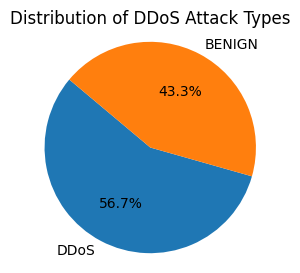

In [11]:
visualize_labels_distribution(ddos_data)


In [12]:
ddos_data[' Timestamp']


0         7/7/2017 3:30
1         7/7/2017 3:30
2         7/7/2017 3:30
3         7/7/2017 3:30
4         7/7/2017 3:30
              ...      
225740    7/7/2017 5:02
225741    7/7/2017 5:02
225742    7/7/2017 5:02
225743    7/7/2017 5:02
225744    7/7/2017 5:02
Name:  Timestamp, Length: 225745, dtype: object

In [13]:
def normalize_timestamp(ddos_data):
    ddos_data[' Timestamp'] = pd.to_datetime(ddos_data[' Timestamp'])
    ddos_data.sort_values(by=' Timestamp', inplace=True)

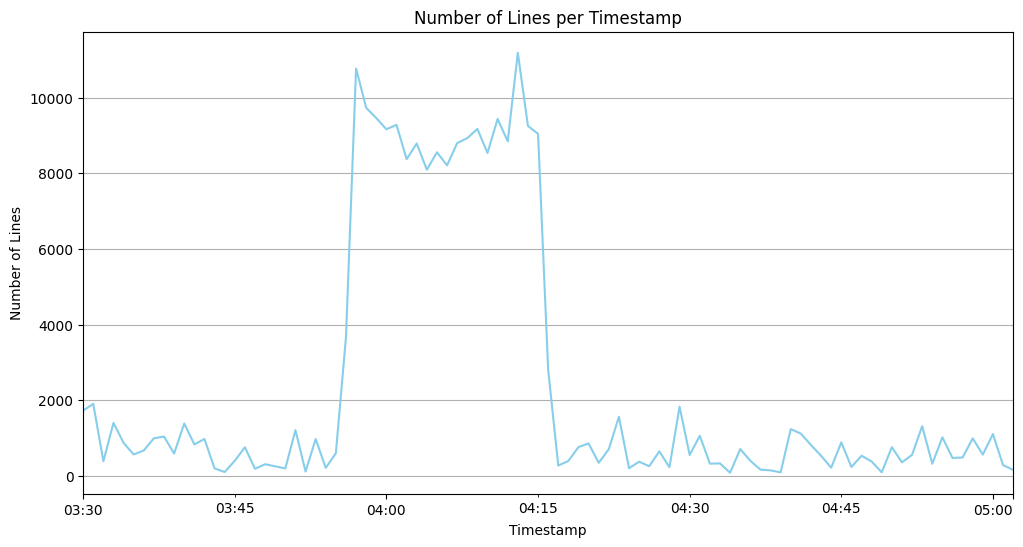

In [14]:
normalize_timestamp(ddos_data)
connection_grouped_by_time=ddos_data.groupby(' Timestamp').size()
plt.figure(figsize=(12, 6))
connection_grouped_by_time.plot(kind='line', color='skyblue')
plt.xlabel('Timestamp')
plt.ylabel('Number of Lines')
#plt.xticks(rotation=90)
plt.title('Number of Lines per Timestamp')
plt.grid(axis='y')
plt.show()


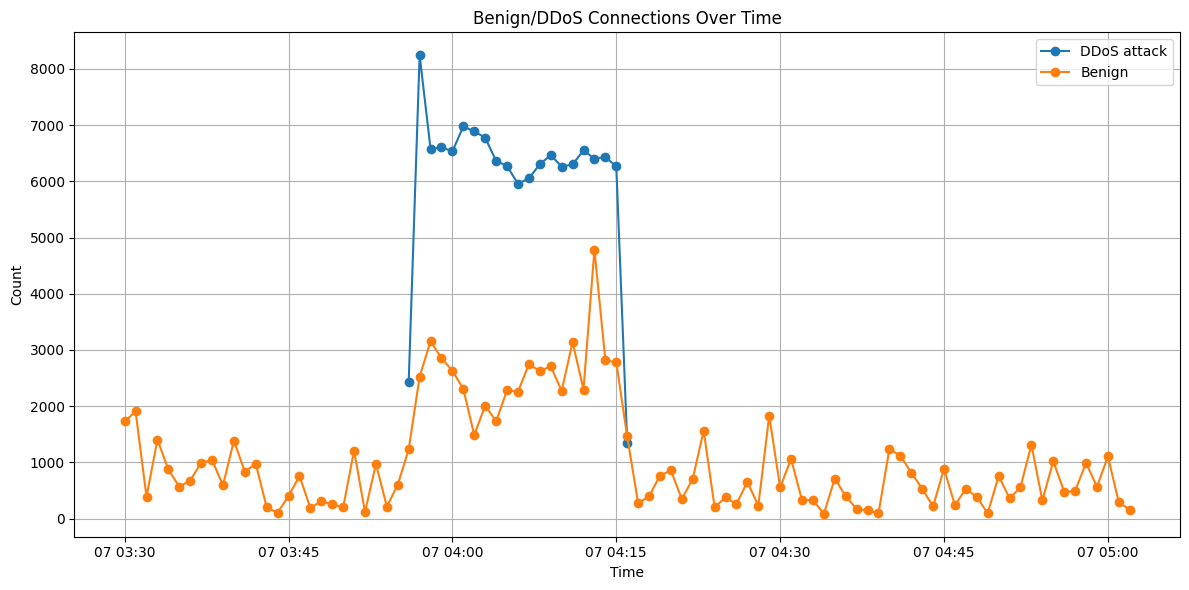

In [15]:
connection_by_time_b=ddos_data[ddos_data[' Label']=='BENIGN'].groupby(' Timestamp').size()
connection_by_time_nb=ddos_data[ddos_data[' Label']!='BENIGN'].groupby(' Timestamp').size()
plt.figure(figsize=(12, 6))
plt.plot(connection_by_time_nb.index, connection_by_time_nb.values, marker='o', linestyle='-',label='DDoS attack')
plt.plot(connection_by_time_b.index, connection_by_time_b.values, marker='o', linestyle='-', label='Benign')
plt.title('Benign/DDoS Connections Over Time')
plt.xlabel('Time')
plt.ylabel('Count')
#plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

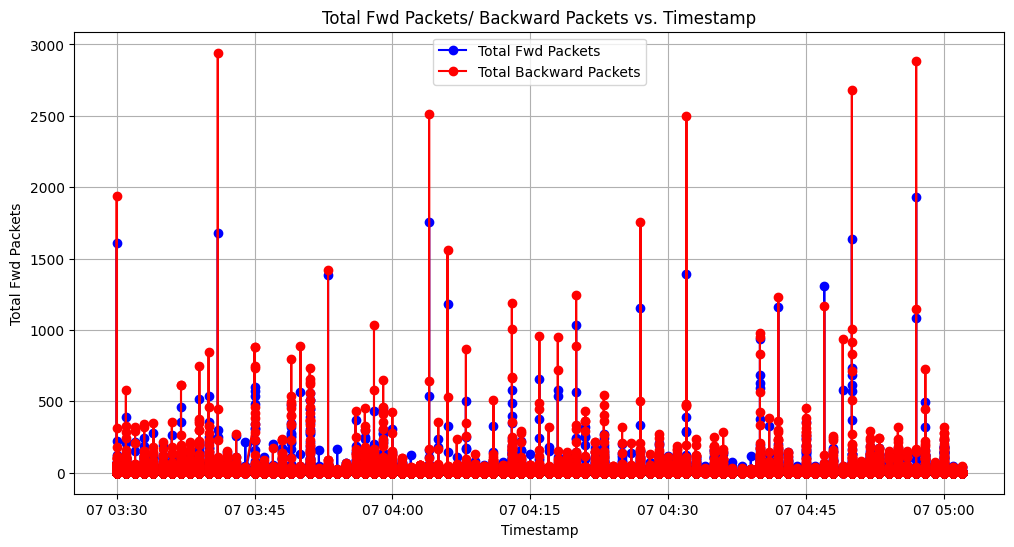

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(ddos_data[' Timestamp'], ddos_data[' Total Fwd Packets'], color='blue', marker='o', linestyle='-', label='Total Fwd Packets')
plt.plot(ddos_data[' Timestamp'], ddos_data[' Total Backward Packets'], color='red', marker='o', linestyle='-', label='Total Backward Packets')
plt.title('Total Fwd Packets/ Backward Packets vs. Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Total Fwd Packets')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
categorical_features = [col for col in ddos_data.columns if ddos_data[col].dtype == 'object']
categorical_features

['Flow ID', ' Source IP', ' Destination IP', ' Label']

In [18]:
binary_columns=ddos_data.columns[ddos_data.nunique()==2].tolist()
binary_columns

['Fwd PSH Flags',
 'FIN Flag Count',
 ' SYN Flag Count',
 ' RST Flag Count',
 ' PSH Flag Count',
 ' ACK Flag Count',
 ' URG Flag Count',
 ' ECE Flag Count',
 ' Label']

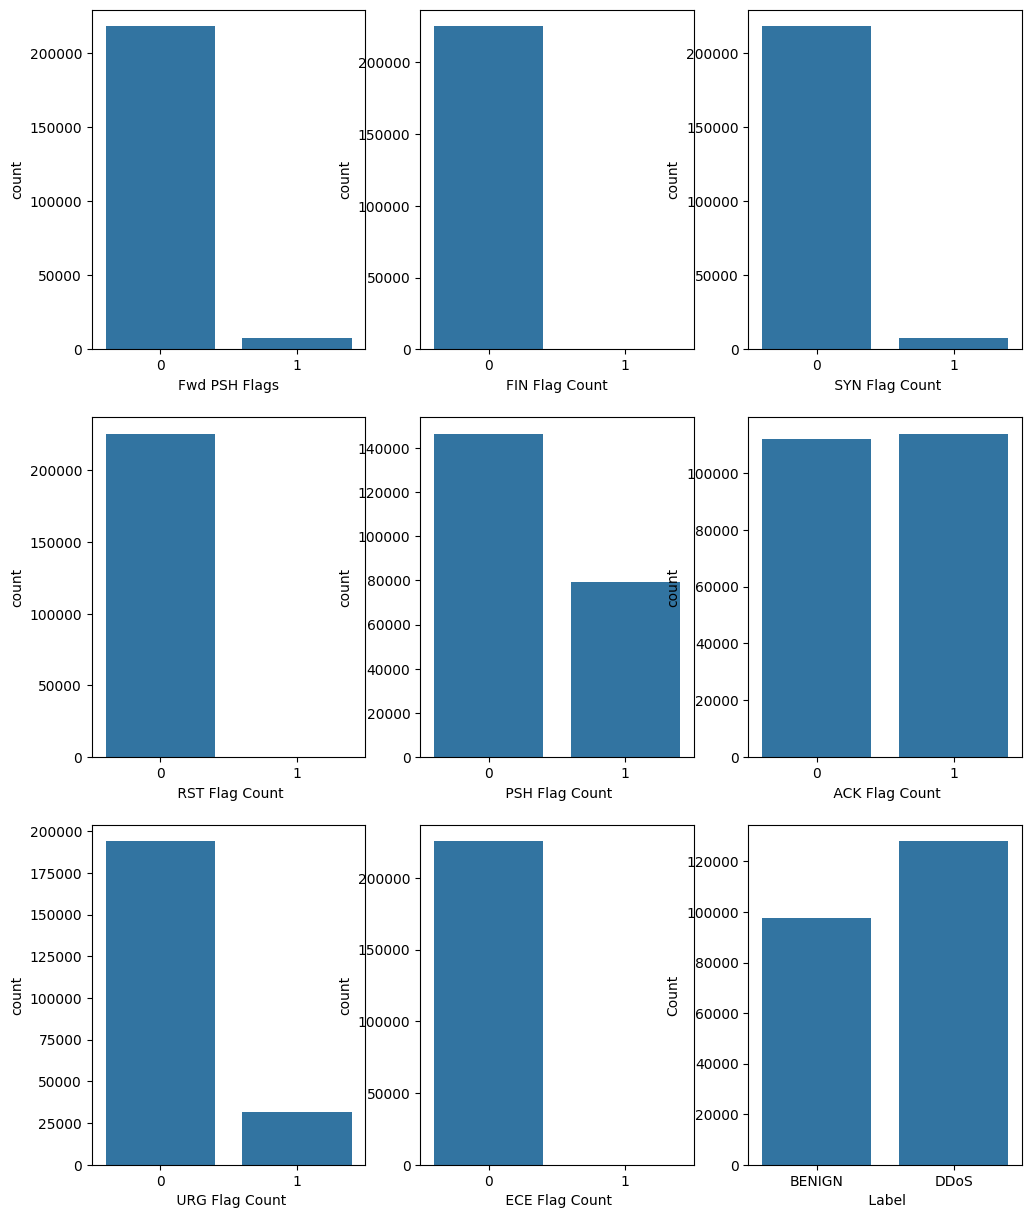

In [19]:
fig, ax = plt.subplots(3, 3, figsize=(12, 15))
ax = ax.flatten()
for i, column in enumerate(binary_columns):
    sns.countplot(data=ddos_data, x=column, ax=ax[i])
    #plt.title(f'Distribution of {column} by Label')
    plt.xlabel(column)
    plt.ylabel('Count')
plt.show()

C:\Users\asuresh\AppData\Local\Temp\ipykernel_18696\2583857641.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Label')
C:\Users\asuresh\AppData\Local\Temp\ipykernel_18696\2583857641.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Label')
C:\Users\asuresh\AppData\Local\Temp\ipykernel_18696\2583857641.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Label')
C:\Users\asuresh\AppData\Local\Temp\ipykernel_18696\2583857641.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored wh

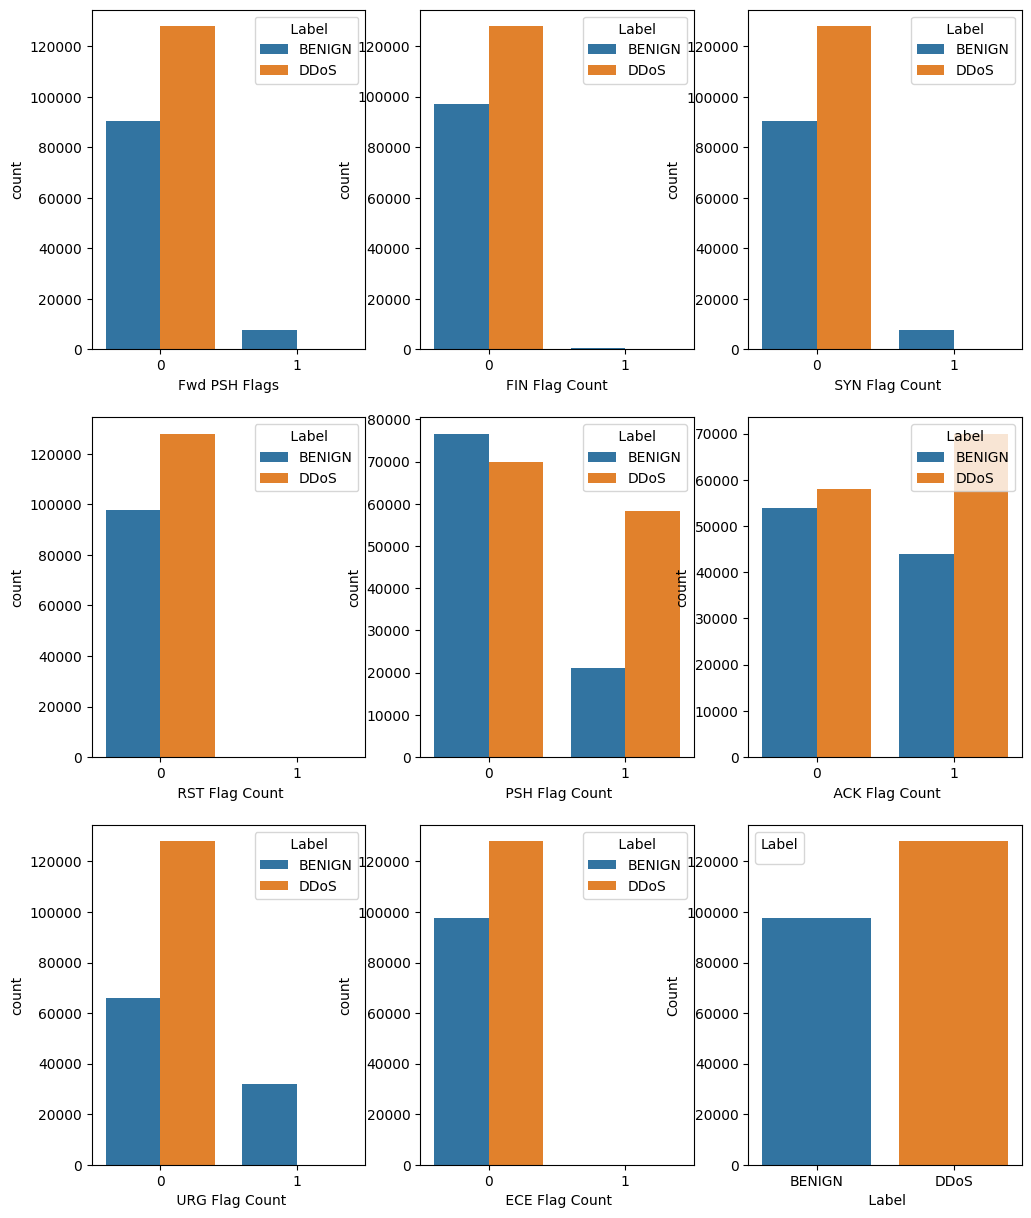

In [20]:
fig, ax = plt.subplots(3, 3, figsize=(12, 15))
ax = ax.flatten()
for i, column in enumerate(binary_columns):
    sns.countplot(data=ddos_data, x=column, hue=' Label',ax=ax[i])
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Label')
plt.show()

In [20]:
ddos_data.nunique()


Flow ID              86421
 Source IP            2067
 Source Port         50697
 Destination IP       2554
 Destination Port    23950
                     ...  
Idle Mean            35285
 Idle Std             5857
 Idle Max            33002
 Idle Min            48018
 Label                   2
Length: 85, dtype: int64

In [21]:
ddos_data[' Protocol'].value_counts()


 Protocol
6     192820
17     32871
0         54
Name: count, dtype: int64

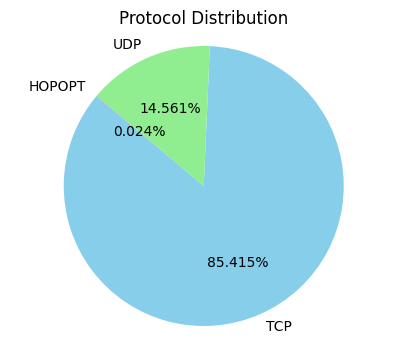

In [21]:
protocol_counts=ddos_data[' Protocol'].value_counts()
protocol_names={
    6: 'TCP', 17: 'UDP', 0: 'HOPOPT'
}
protocol_counts.index = protocol_counts.index.map(protocol_names)
plt.figure(figsize=(5, 4))
protocol_counts.plot(kind='pie', autopct='%1.3f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Protocol Distribution')
plt.ylabel('')
plt.axis('equal')
plt.show()

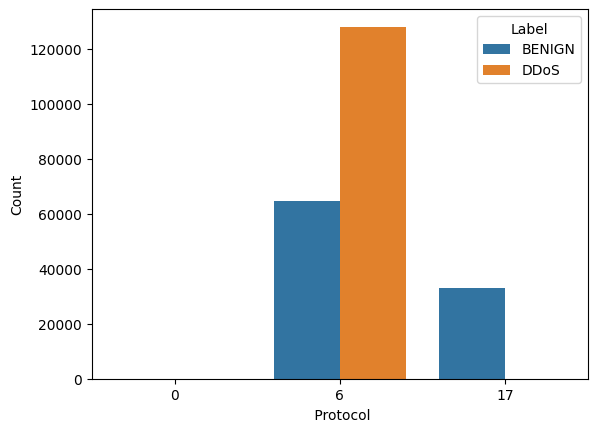

In [22]:
sns.countplot(data=ddos_data, x=' Protocol', hue=' Label')
plt.xlabel(' Protocol')
plt.ylabel('Count')
plt.legend(title='Label')

In [23]:
discrete_vars_non_binary = [col for col in ddos_data.columns if ddos_data[col].dtype == 'int64' and col not in binary_columns]
continuous_vars = [col for col in ddos_data.columns if ddos_data[col].dtype == 'float64']

In [24]:
def viz_variable(variable):
    non_benign_data = ddos_data[ddos_data[' Label'] != 'BENIGN']
    non_benign_bytes_by_time = non_benign_data.groupby([' Timestamp', variable]).size().reset_index(name='count')
    non_benign_bytes_by_time = non_benign_bytes_by_time.groupby(' Timestamp')[variable].mean()

    benign_data = ddos_data[ddos_data[' Label'] == 'BENIGN']

    benign_bytes_by_time =benign_data.groupby([' Timestamp', variable]).size().reset_index(name='count')
    benign_bytes_by_time = benign_bytes_by_time.groupby(' Timestamp')[variable].mean()

    plt.figure(figsize=(12, 6))
    plt.plot(non_benign_bytes_by_time.index, non_benign_bytes_by_time.values, label='Non-Benign', linestyle='-', marker='o')
    plt.plot(benign_bytes_by_time.index, benign_bytes_by_time.values, label='Benign', linestyle='-', marker='o')
    plt.title('Average '+variable+ ' Received Over Time for non benign connections')
    plt.xlabel('Time')
    plt.ylabel('Average Bytes')
    plt.xticks(rotation=90)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [25]:
discrete_vars_non_binary

[' Source Port',
 ' Destination Port',
 ' Protocol',
 ' Flow Duration',
 ' Total Fwd Packets',
 ' Total Backward Packets',
 'Total Length of Fwd Packets',
 ' Total Length of Bwd Packets',
 ' Fwd Packet Length Max',
 ' Fwd Packet Length Min',
 'Bwd Packet Length Max',
 ' Bwd Packet Length Min',
 ' Flow IAT Max',
 ' Flow IAT Min',
 'Fwd IAT Total',
 ' Fwd IAT Max',
 ' Fwd IAT Min',
 'Bwd IAT Total',
 ' Bwd IAT Max',
 ' Bwd IAT Min',
 ' Bwd PSH Flags',
 ' Fwd URG Flags',
 ' Bwd URG Flags',
 ' Fwd Header Length',
 ' Bwd Header Length',
 ' Min Packet Length',
 ' Max Packet Length',
 ' CWE Flag Count',
 ' Down/Up Ratio',
 ' Fwd Header Length.1',
 'Fwd Avg Bytes/Bulk',
 ' Fwd Avg Packets/Bulk',
 ' Fwd Avg Bulk Rate',
 ' Bwd Avg Bytes/Bulk',
 ' Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate',
 'Subflow Fwd Packets',
 ' Subflow Fwd Bytes',
 ' Subflow Bwd Packets',
 ' Subflow Bwd Bytes',
 'Init_Win_bytes_forward',
 ' Init_Win_bytes_backward',
 ' act_data_pkt_fwd',
 ' min_seg_size_forward',
 ' Active

In [26]:
constant_columns=ddos_data.columns[ddos_data.nunique()==1]
constant_columns
len(constant_columns)

10

In [27]:
for column in constant_columns:
  print(f'The colonne {column} takes only one value:\n {ddos_data[column].value_counts()}\n')

The colonne  Bwd PSH Flags takes only one value:
  Bwd PSH Flags
0    225745
Name: count, dtype: int64

The colonne  Fwd URG Flags takes only one value:
  Fwd URG Flags
0    225745
Name: count, dtype: int64

The colonne  Bwd URG Flags takes only one value:
  Bwd URG Flags
0    225745
Name: count, dtype: int64

The colonne  CWE Flag Count takes only one value:
  CWE Flag Count
0    225745
Name: count, dtype: int64

The colonne Fwd Avg Bytes/Bulk takes only one value:
 Fwd Avg Bytes/Bulk
0    225745
Name: count, dtype: int64

The colonne  Fwd Avg Packets/Bulk takes only one value:
  Fwd Avg Packets/Bulk
0    225745
Name: count, dtype: int64

The colonne  Fwd Avg Bulk Rate takes only one value:
  Fwd Avg Bulk Rate
0    225745
Name: count, dtype: int64

The colonne  Bwd Avg Bytes/Bulk takes only one value:
  Bwd Avg Bytes/Bulk
0    225745
Name: count, dtype: int64

The colonne  Bwd Avg Packets/Bulk takes only one value:
  Bwd Avg Packets/Bulk
0    225745
Name: count, dtype: int64

The colo

In [28]:
ddos_data[[ 'Flow ID',' Destination IP',' Source IP', ' Destination Port',' Source Port',' Protocol']]


,Flow ID,Destination IP,Source IP,Destination Port,Source Port,Protocol
0,192.168.10.5-104.16.207.165-54865-443-6,192.168.10.5,104.16.207.165,54865,443,6
1158,192.168.10.3-192.168.10.5-53-56771-17,192.168.10.3,192.168.10.5,53,56771,17
1157,192.168.10.3-192.168.10.5-53-55057-17,192.168.10.3,192.168.10.5,53,55057,17
1156,192.168.10.3-192.168.10.5-53-53400-17,192.168.10.3,192.168.10.5,53,53400,17
1155,192.168.10.3-192.168.10.5-53-62896-17,192.168.10.3,192.168.10.5,53,62896,17
...,...,...,...,...,...,...
225640,192.168.10.3-192.168.10.19-53-20516-17,192.168.10.3,192.168.10.19,53,20516,17
225641,192.168.10.3-192.168.10.19-53-21215-17,192.168.10.3,192.168.10.19,53,21215,17
225642,192.168.10.3-192.168.10.19-53-48588-17,192.168.10.3,192.168.10.19,53,48588,17
225664,192.168.10.19-62.161.94.230-54279-443-6,62.161.94.230,192.168.10.19,443,54279,6


In [29]:
are_equal = (ddos_data[' Fwd Header Length'] == ddos_data[' Fwd Header Length.1'])
all_equal = are_equal.all()
if all_equal:
    print("The two columns are the same.")
else:
    print("The two columns are not the same.")

The two columns are the same.


In [116]:
def dropping_const_and_red_columns(ddos_data):
    ddos_data.drop(['Flow ID',' Fwd Header Length.1'],axis=1,inplace=True)
    ddos_data.drop(columns=constant_columns,inplace=True)

In [117]:
dropping_const_and_red_columns(ddos_data)



KeyError: "['Flow ID', ' Fwd Header Length.1'] not found in axis"

In [118]:
# Initialize LabelEncoder
label_encoder=LabelEncoder()
# Function to encode ' Label'
def encode_label_col(ddos_data):
    ddos_data[' Label']=label_encoder.fit_transform(ddos_data[' Label'])
# Function to encode IP addresses
def encoding_ip_srv_dst(ddos_data):
    all_ip=pd.concat([ddos_data[' Source IP'],ddos_data[' Destination IP']])
    label_encoder.fit(all_ip)
    ddos_data[' Source IP']=label_encoder.transform(ddos_data[' Source IP'])
    ddos_data[' Destination IP']=label_encoder.transform(ddos_data[' Destination IP'])

In [33]:
encode_label_col(ddos_data)
encoding_ip_srv_dst(ddos_data)

In [34]:
ddos_data


,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,24,443,871,54865,6,2017-07-07 03:30:00,3,2,0,12,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1158,871,56771,870,53,17,2017-07-07 03:30:00,59362,4,2,152,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1157,871,55057,870,53,17,2017-07-07 03:30:00,61344,4,2,176,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1156,871,53400,870,53,17,2017-07-07 03:30:00,238,2,2,82,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1155,871,62896,870,53,17,2017-07-07 03:30:00,24052,2,2,124,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225640,867,20516,870,53,17,2017-07-07 05:02:00,254,2,2,70,...,40,0.0,0.0,0,0,0.0,0.0,0,0,0
225641,867,21215,870,53,17,2017-07-07 05:02:00,302,2,2,70,...,40,0.0,0.0,0,0,0.0,0.0,0,0,0
225642,867,48588,870,53,17,2017-07-07 05:02:00,273,2,2,70,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
225664,867,54279,2209,443,6,2017-07-07 05:02:00,11,2,0,12,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [35]:
#I made this copy without the ' Timestamp' on which I will do a correlation analysis
ddos_data_cp=ddos_data.drop(' Timestamp',axis=1)

In [36]:
ddos_data_cp.corr()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
Source IP,1.000000,-0.364323,-0.010057,0.454587,0.298156,-0.040601,0.020113,0.038123,0.210294,-0.037069,...,0.289566,-0.022408,0.079552,0.013414,-0.037990,-0.084251,-0.067886,-0.090827,-0.062509,-0.752707
Source Port,-0.364323,1.000000,0.292387,-0.727093,0.193702,0.066677,0.046492,-0.005598,-0.376220,0.053109,...,0.051752,0.035426,0.015362,0.037363,0.034631,0.051217,0.040340,0.055066,0.037903,0.388721
Destination IP,-0.010057,0.292387,1.000000,-0.374056,0.003325,-0.045646,0.054167,0.011315,-0.209284,0.026897,...,0.166936,-0.036924,0.081243,0.006315,-0.050291,-0.111537,-0.082802,-0.118200,-0.085869,0.019534
Destination Port,0.454587,-0.727093,-0.374056,1.000000,-0.183045,0.107038,-0.044270,0.008321,0.553843,-0.066648,...,-0.074278,0.061313,-0.026592,0.043156,0.066356,0.132272,0.110687,0.144428,0.095687,-0.509798
Protocol,0.298156,0.193702,0.003325,-0.183045,1.000000,-0.194691,-0.077461,-0.052777,-0.107639,-0.060670,...,0.474116,-0.096252,-0.033096,-0.099233,-0.092237,-0.169636,-0.116058,-0.176677,-0.133858,-0.471904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Idle Mean,-0.084251,0.051217,-0.111537,0.132272,-0.169636,0.871855,0.110787,0.065554,0.261110,0.042256,...,-0.139772,0.595859,0.022025,0.531538,0.602021,1.000000,0.420170,0.952585,0.910822,0.087114
Idle Std,-0.067886,0.040340,-0.082802,0.110687,-0.116058,0.630604,0.056807,0.028627,0.216771,0.020081,...,-0.099363,-0.057820,-0.003866,-0.055222,-0.058847,0.420170,1.000000,0.676276,0.008218,0.078023
Idle Max,-0.090827,0.055066,-0.118200,0.144428,-0.176677,0.919199,0.109429,0.062932,0.284694,0.041055,...,-0.146873,0.464725,0.017842,0.413812,0.469089,0.952585,0.676276,1.000000,0.742109,0.096775
Idle Min,-0.062509,0.037903,-0.085869,0.095687,-0.133858,0.672003,0.094747,0.058056,0.188569,0.036789,...,-0.109090,0.682722,0.024496,0.609839,0.690201,0.910822,0.008218,0.742109,1.000000,0.061243


In [37]:
correlation_matrix = ddos_data_cp.corr()

# Get the highly correlated features (absolute correlation > 0.5)
highly_correlated = correlation_matrix.abs() > 0.9

# Extract the indices of highly correlated features
correlated_features = [(feature1, feature2) for feature1 in correlation_matrix.columns 
                       for feature2 in correlation_matrix.columns 
                       if highly_correlated.loc[feature1, feature2] and feature1 != feature2]

# Print the highly correlated feature pairs
printed_pairs = set()
for feature1, feature2 in correlated_features:
    if (feature2, feature1) not in printed_pairs:  # Check if the pair has already been printed
        print(f"{feature1} and {feature2} are highly correlated: {correlation_matrix.loc[feature1, feature2]}")
        printed_pairs.add((feature1, feature2)) 

 Flow Duration and  Flow IAT Max are highly correlated: 0.9202572641153386
 Flow Duration and Fwd IAT Total are highly correlated: 0.9970539718291983
 Flow Duration and  Fwd IAT Max are highly correlated: 0.9179458157781236
 Flow Duration and  Idle Max are highly correlated: 0.9191990945209536
 Total Fwd Packets and  Total Backward Packets are highly correlated: 0.9567137090959948
 Total Fwd Packets and  Total Length of Bwd Packets are highly correlated: 0.938469804025713
 Total Fwd Packets and  Fwd Header Length are highly correlated: 0.9684337767327689
 Total Fwd Packets and  Bwd Header Length are highly correlated: 0.9287367502694396
 Total Fwd Packets and Subflow Fwd Packets are highly correlated: 1.0
 Total Fwd Packets and  Subflow Bwd Packets are highly correlated: 0.9567137090959948
 Total Fwd Packets and  Subflow Bwd Bytes are highly correlated: 0.938469804025713
 Total Backward Packets and  Total Length of Bwd Packets are highly correlated: 0.9704220020372509
 Total Backward P

In [38]:


corr_set1=[' Flow Duration',' Flow IAT Max','Fwd IAT Total',' Fwd IAT Max',' Idle Max']
# Calculate the correlation between the features and the 'Label' column
correlation_set1 = ddos_data[corr_set1 + [' Label']].corr()

# Get the correlation of each feature with the 'Label' column
label_correlation_set1 = correlation_set1[' Label'].drop(' Label')

print(label_correlation_set1)

 Flow Duration    0.025923
 Flow IAT Max     0.100654
Fwd IAT Total     0.040565
 Fwd IAT Max      0.105457
 Idle Max         0.096775
Name:  Label, dtype: float64


In [39]:
ddos_data.drop(columns=[' Flow Duration',' Flow IAT Max','Fwd IAT Total',' Idle Max'],inplace=True)

In [40]:
corr_set2=[' Total Fwd Packets',' Total Backward Packets',' Total Length of Bwd Packets',' Fwd Header Length',' Bwd Header Length','Subflow Fwd Packets',' Subflow Bwd Packets',' Subflow Bwd Bytes']
# Calculate the correlation between the features and the 'Label' column

correlation_set2 = ddos_data[corr_set2 + [' Label']].corr()

# Get the correlation of each feature with the 'Label' column
label_correlation_set2 = correlation_set2[' Label'].drop(' Label')

print(label_correlation_set2)

 Total Fwd Packets             -0.029870
 Total Backward Packets        -0.069290
 Total Length of Bwd Packets    0.041244
 Fwd Header Length             -0.043942
 Bwd Header Length             -0.076183
Subflow Fwd Packets            -0.029870
 Subflow Bwd Packets           -0.069290
 Subflow Bwd Bytes              0.041244
Name:  Label, dtype: float64


In [41]:
ddos_data.drop(columns=[' Total Fwd Packets',' Total Backward Packets',' Total Length of Bwd Packets',' Fwd Header Length','Subflow Fwd Packets',' Subflow Bwd Packets',' Subflow Bwd Bytes'],inplace=True)

In [42]:
ddos_data.drop(['Fwd PSH Flags',' RST Flag Count'],axis=1,inplace=True)

In [43]:
ddos_data.drop([' Subflow Fwd Bytes',' Fwd Packet Length Mean'],axis=1,inplace=True)

In [44]:
corr_set3=[' Fwd Packet Length Max',' Fwd Packet Length Std',' Avg Fwd Segment Size']

correlation_set3 = ddos_data[corr_set3 + [' Label']].corr()

# Get the correlation of each feature with the 'Label' column
label_correlation_set3 = correlation_set3[' Label'].drop(' Label')

print(label_correlation_set3)

Fwd Packet Length Max   -0.321529
Fwd Packet Length Std   -0.300271
Avg Fwd Segment Size    -0.356895
Name:  Label, dtype: float64


In [45]:
ddos_data.drop([' Fwd Packet Length Max',' Fwd Packet Length Std'],axis=1,inplace=True)


In [46]:
corr_set4=['Bwd Packet Length Max',' Bwd Packet Length Mean',' Bwd Packet Length Std',' Avg Bwd Segment Size']
correlation_set4 = ddos_data[corr_set4 + [' Label']].corr()

# Get the correlation of each feature with the 'Label' column
label_correlation_set4 = correlation_set4[' Label'].drop(' Label')

print(label_correlation_set4)

Bwd Packet Length Max      0.577323
 Bwd Packet Length Mean    0.603299
 Bwd Packet Length Std     0.576155
 Avg Bwd Segment Size      0.603299
Name:  Label, dtype: float64


In [47]:
ddos_data.drop(['Bwd Packet Length Max',' Bwd Packet Length Mean',' Bwd Packet Length Std'],axis=1,inplace=True)

In [48]:
corr_set5=[' Flow IAT Mean',' Flow IAT Std',' Fwd IAT Mean',' Fwd IAT Std',' Fwd IAT Max','Idle Mean',' Fwd IAT Min',' Bwd IAT Min',' Bwd IAT Max']
correlation_set5 = ddos_data[corr_set5 + [' Label']].corr()

# Get the correlation of each feature with the 'Label' column
label_correlation_set5 = correlation_set5[' Label'].drop(' Label')

print(label_correlation_set5)

 Flow IAT Mean    0.127503
 Flow IAT Std     0.129630
 Fwd IAT Mean     0.022030
 Fwd IAT Std      0.099651
 Fwd IAT Max      0.105457
Idle Mean         0.087114
 Fwd IAT Min     -0.061743
 Bwd IAT Min     -0.064277
 Bwd IAT Max     -0.292054
Name:  Label, dtype: float64


In [49]:
ddos_data.drop([' Flow IAT Mean',' Flow IAT Std',' Fwd IAT Mean',' Fwd IAT Std',' Fwd IAT Max','Idle Mean',' Fwd IAT Min',' Bwd IAT Min'],axis=1,inplace=True)

In [50]:
corr_set6=[' Bwd IAT Std',' Bwd IAT Max',' Max Packet Length',' Packet Length Mean',' Packet Length Std',' Packet Length Variance',' Average Packet Size']
correlation_set6 = ddos_data[corr_set6 + [' Label']].corr()

# Get the correlation of each feature with the 'Label' column
label_correlation_set6 = correlation_set6[' Label'].drop(' Label')

print(label_correlation_set6)

Bwd IAT Std              -0.290896
Bwd IAT Max              -0.292054
Max Packet Length         0.414399
Packet Length Mean        0.454283
Packet Length Std         0.443749
Packet Length Variance    0.408089
Average Packet Size       0.453472
Name:  Label, dtype: float64


In [51]:
ddos_data.drop(columns=[' Bwd IAT Std',' Bwd IAT Max',' Max Packet Length',' Packet Length Std',' Packet Length Variance',' Average Packet Size'],axis=1,inplace=True)

In [52]:
corr_set7=['Active Mean',' Active Max',' Active Min']
correlation_set7 = ddos_data[corr_set7 + [' Label']].corr()

# Get the correlation of each feature with the 'Label' column
label_correlation_set7 = correlation_set7[' Label'].drop(' Label')

print(label_correlation_set7)

Active Mean    0.022905
 Active Max   -0.009271
 Active Min    0.033821
Name:  Label, dtype: float64


In [53]:
ddos_data.drop(columns=['Active Mean',' Active Max'],inplace=True)

In [54]:
ddos_data.corr()


,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Total Length of Fwd Packets,Fwd Packet Length Min,Bwd Packet Length Min,Flow Bytes/s,...,Avg Bwd Segment Size,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Std,Active Min,Idle Std,Idle Min,Label
Source IP,1.000000,-0.364323,-0.010057,0.454587,0.298156,0.122868,0.210294,0.123614,0.235521,0.030494,...,-0.460018,0.032815,0.165985,-0.011737,0.289566,0.079552,-0.037990,-0.067886,-0.062509,-0.752707
Source Port,-0.364323,1.000000,0.292387,-0.727093,0.193702,0.045245,-0.376220,-0.183577,0.149612,-0.010242,...,0.307940,0.059325,-0.028756,0.053464,0.051752,0.015362,0.034631,0.040340,0.037903,0.388721
Destination IP,-0.010057,0.292387,1.000000,-0.374056,0.003325,0.068110,-0.209284,-0.129450,-0.005483,0.001423,...,0.045612,0.301908,0.162807,0.041041,0.166936,0.081243,-0.050291,-0.082802,-0.085869,0.019534
Destination Port,0.454587,-0.727093,-0.374056,1.000000,-0.183045,0.017646,0.553843,0.207158,-0.119517,0.025816,...,-0.351014,-0.112897,0.027405,-0.051366,-0.074278,-0.026592,0.066356,0.110687,0.095687,-0.509798
Protocol,0.298156,0.193702,0.003325,-0.183045,1.000000,0.092528,-0.107639,0.038159,0.725937,0.010361,...,-0.288596,-0.217913,-0.057460,-0.074932,0.474116,-0.033096,-0.092237,-0.116058,-0.133858,-0.471904
Timestamp,0.122868,0.045245,0.068110,0.017646,0.092528,1.000000,-0.012689,0.002017,0.067928,0.002371,...,-0.109049,0.078014,0.048239,0.003010,0.056821,0.005866,-0.020714,-0.032623,-0.031609,-0.147953
Total Length of Fwd Packets,0.210294,-0.376220,-0.209284,0.553843,-0.107639,-0.012689,1.000000,0.004453,-0.073738,0.001499,...,-0.199152,0.060274,0.024830,0.161399,-0.048262,0.106051,0.171280,0.216771,0.188569,-0.319693
Fwd Packet Length Min,0.123614,-0.183577,-0.129450,0.207158,0.038159,0.002017,0.004453,1.000000,0.033618,-0.000616,...,-0.131073,-0.084467,-0.013014,-0.040054,-0.000325,-0.010325,-0.035780,-0.048230,-0.021718,-0.180094
Bwd Packet Length Min,0.235521,0.149612,-0.005483,-0.119517,0.725937,0.067928,-0.073738,0.033618,1.000000,0.013258,...,-0.212724,-0.164156,-0.038517,-0.060982,0.343618,-0.016336,-0.069898,-0.092328,-0.107084,-0.365667
Flow Bytes/s,0.030494,-0.010242,0.001423,0.025816,0.010361,0.002371,0.001499,-0.000616,0.013258,1.000000,...,-0.022963,-0.001523,-0.003410,-0.003713,0.021245,-0.002126,-0.007847,-0.009814,-0.013555,-0.035545


In [55]:
correlation_matrix = ddos_data_cp.corr()

# Select the correlation values of the 'Label' column
label_correlation = correlation_matrix[' Label']

# Print the correlation values
print(label_correlation)

 Source IP          -0.752707
 Source Port         0.388721
 Destination IP      0.019534
 Destination Port   -0.509798
 Protocol           -0.471904
                       ...   
Idle Mean            0.087114
 Idle Std            0.078023
 Idle Max            0.096775
 Idle Min            0.061243
 Label               1.000000
Name:  Label, Length: 72, dtype: float64


In [56]:
def setting_time_as_an_index(ddos_data):
    ddos_data.set_index(' Timestamp', inplace=True)

In [57]:
setting_time_as_an_index(ddos_data)


In [58]:
ddos_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 225745 entries, 2017-07-07 03:30:00 to 2017-07-07 05:02:00
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0    Source IP                   225745 non-null  int32  
 1    Source Port                 225745 non-null  int64  
 2    Destination IP              225745 non-null  int32  
 3    Destination Port            225745 non-null  int64  
 4    Protocol                    225745 non-null  int64  
 5   Total Length of Fwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Min       225745 non-null  int64  
 7    Bwd Packet Length Min       225745 non-null  int64  
 8   Flow Bytes/s                 225741 non-null  float64
 9    Flow Packets/s              225745 non-null  float64
 10   Flow IAT Min                225745 non-null  int64  
 11  Bwd IAT Total                225745 non-null  int64  
 12   Bwd IAT Mean           

In [59]:
non_binary_columns=ddos_data.columns[ddos_data.nunique()>2]


In [60]:
scaler=StandardScaler()
def scale_num_features(ddos_data):
    ddos_data[non_binary_columns]=scaler.fit_transform(ddos_data[non_binary_columns])

In [61]:
is_infinite = np.any(np.isinf(ddos_data[non_binary_columns]), axis=0)
is_large = np.any(np.abs(ddos_data[non_binary_columns]) > np.finfo(np.float64).max, axis=0)

In [62]:
columns_with_issues = non_binary_columns[is_infinite]
print("Columns with Infinite or Large Values:", columns_with_issues)

Columns with Infinite or Large Values: Index(['Flow Bytes/s', ' Flow Packets/s'], dtype='object')


In [63]:
ddos_data.drop(columns=['Flow Bytes/s',' Flow Packets/s'], inplace=True)

In [64]:
non_binary_columns=ddos_data.columns[ddos_data.nunique()>2]

In [65]:
scale_num_features(ddos_data)

In [66]:
final_columns=ddos_data.columns

In [67]:
print("hello")

hello


In [68]:
trainX=[]
trainY=[] 
n_future=1
n_past=10
for i in range(n_past,len(ddos_data)-n_future+1):
    trainX.append(ddos_data.iloc[i-n_past:i, :])
    trainY.append(ddos_data.iloc[i+n_future-1:i+n_future][' Label'])
trainX, trainY=np.array(trainX), np.array(trainY)

In [69]:
print(f'trainX shape=={trainX.shape}')
print(f'trainY shape=={trainY.shape}')

trainX shape==(225735, 10, 34)
trainY shape==(225735, 1)


In [70]:
model=Sequential([
    LSTM(units=128, return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2])),
    LSTM(units=64, return_sequences=True),
    LSTM(units=32, return_sequences=False),
    Dropout(0.01),
    Dense(units=1, activation='sigmoid') 
])
model.compile(optimizer=Adam(learning_rate=1e-4),loss=BinaryCrossentropy(),metrics=['accuracy'])
model.summary()

C:\Users\asuresh\anaconda3\envs\tf\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 128)             │          83,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 10, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 145,313 (567.63 KB)

 Trainable params: 145,313 (567.63 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
history_log=model.fit(trainX, trainY, epochs=100, batch_size=1024, validation_split=0.2,verbose=2, shuffle=False)


Epoch 1/100
177/177 - 30s - 169ms/step - accuracy: 0.9671 - loss: 0.3097 - val_accuracy: 0.9617 - val_loss: 0.2038
Epoch 2/100
177/177 - 13s - 73ms/step - accuracy: 0.9889 - loss: 0.0777 - val_accuracy: 0.9836 - val_loss: 0.0813
Epoch 3/100
177/177 - 13s - 73ms/step - accuracy: 0.9914 - loss: 0.0492 - val_accuracy: 0.9911 - val_loss: 0.0506
Epoch 4/100
177/177 - 13s - 73ms/step - accuracy: 0.9920 - loss: 0.0422 - val_accuracy: 0.9928 - val_loss: 0.0411
Epoch 5/100
177/177 - 13s - 72ms/step - accuracy: 0.9921 - loss: 0.0390 - val_accuracy: 0.9932 - val_loss: 0.0370
Epoch 6/100
177/177 - 13s - 72ms/step - accuracy: 0.9923 - loss: 0.0366 - val_accuracy: 0.9938 - val_loss: 0.0347
Epoch 7/100
177/177 - 13s - 73ms/step - accuracy: 0.9926 - loss: 0.0345 - val_accuracy: 0.9945 - val_loss: 0.0329
Epoch 8/100
177/177 - 13s - 73ms/step - accuracy: 0.9930 - loss: 0.0324 - val_accuracy: 0.9953 - val_loss: 0.0312
Epoch 9/100
177/177 - 13s - 73ms/step - accuracy: 0.9934 - loss: 0.0303 - val_accuracy:

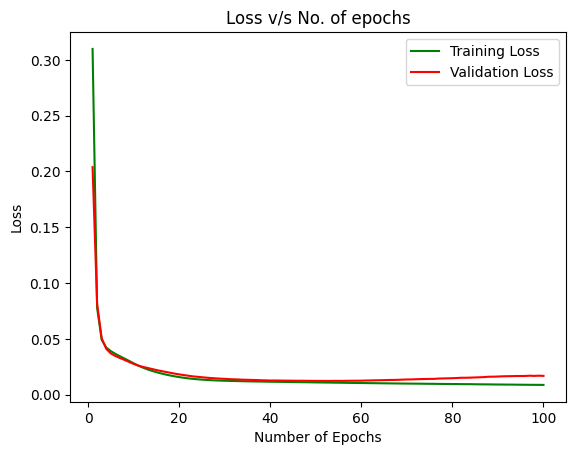

In [72]:
loss = history_log.history['loss']
val_loss = history_log.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Loss v/s No. of epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

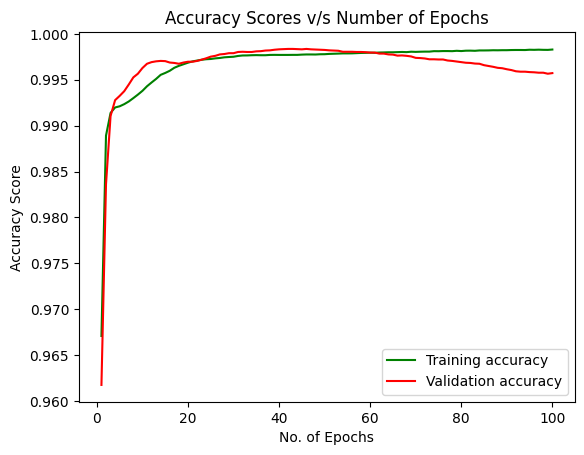

In [73]:
accuracy = history_log.history['accuracy']
val_accuracy = history_log.history['val_accuracy']
plt.plot(epochs, accuracy , 'g', label = 'Training accuracy')
plt.plot(epochs, val_accuracy , 'r', label = 'Validation accuracy')
plt.title('Accuracy Scores v/s Number of Epochs')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [85]:
!pip install wget
import wget

url = 'https://raw.githubusercontent.com/neonithinar/Intrusion-detection-cicDDOS-dataset/main/datasets/dns.csv'
dns = wget.download(url)

url1 = 'https://raw.githubusercontent.com/neonithinar/Intrusion-detection-cicDDOS-dataset/main/datasets/ldap.csv'
ldap = wget.download(url1)

url2 = 'https://raw.githubusercontent.com/neonithinar/Intrusion-detection-cicDDOS-dataset/main/datasets/mssql.csv'
mssql = wget.download(url2)

url3 = 'https://raw.githubusercontent.com/neonithinar/Intrusion-detection-cicDDOS-dataset/main/datasets/netBIOS.csv'
netBIOS = wget.download(url3)

url4 = 'https://raw.githubusercontent.com/neonithinar/Intrusion-detection-cicDDOS-dataset/main/datasets/ntp.csv'
ntp = wget.download(url4)

url5 = 'https://raw.githubusercontent.com/neonithinar/Intrusion-detection-cicDDOS-dataset/main/datasets/snmp.csv'
snmp = wget.download(url5)

url6 = 'https://raw.githubusercontent.com/neonithinar/Intrusion-detection-cicDDOS-dataset/main/datasets/ssdp.csv'
ssdp = wget.download(url6)

url7 = 'https://raw.githubusercontent.com/neonithinar/Intrusion-detection-cicDDOS-dataset/main/datasets/syn.csv'
syn = wget.download(url7)

url8 = 'https://raw.githubusercontent.com/neonithinar/Intrusion-detection-cicDDOS-dataset/main/datasets/tftp.csv'
tftp = wget.download(url8)

url9 = 'https://raw.githubusercontent.com/neonithinar/Intrusion-detection-cicDDOS-dataset/main/datasets/udp.csv'
udp = wget.download(url9)

url10 = 'https://raw.githubusercontent.com/neonithinar/Intrusion-detection-cicDDOS-dataset/main/datasets/udplag.csv'
udplag = wget.download(url10)







100% [........................................................................] 19360387 / 19360387

In [121]:
dfs = []
files = ['dns.csv', 'ldap.csv', 'mssql.csv', 'netBIOS.csv', 'ntp.csv', 'snmp.csv', 'ssdp.csv', 'syn.csv', 'tftp.csv', 'udp.csv', 'udplag.csv']
for file in files:
    df = pd.read_csv(file)
    dfs.append(df)

C:\Users\asuresh\AppData\Local\Temp\ipykernel_18696\1943882692.py:4: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
C:\Users\asuresh\AppData\Local\Temp\ipykernel_18696\1943882692.py:4: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
C:\Users\asuresh\AppData\Local\Temp\ipykernel_18696\1943882692.py:4: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
C:\Users\asuresh\AppData\Local\Temp\ipykernel_18696\1943882692.py:4: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
C:\Users\asuresh\AppData\Local\Temp\ipykernel_18696\1943882692.py:4: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
C:\Users\asuresh\AppData\

In [122]:
ddos_data_test = pd.concat(dfs)


In [123]:
ddos_data_test = ddos_data_test[train_columns]
print(ddos_data_test.shape)

(440000, 85)


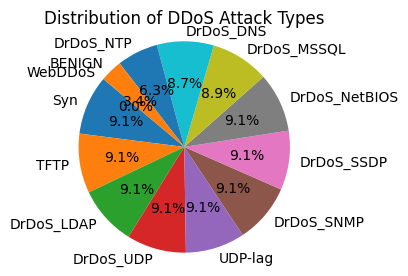

In [124]:
visualize_labels_distribution(ddos_data_test)


In [125]:
normalize_timestamp(ddos_data_test)


In [126]:
dropping_const_and_red_columns(ddos_data_test)


In [127]:
label_encoder=LabelEncoder()
def Encode_Label_Column_1(ddos_data):
    label_mapping = {'BENIGN': 0, 'Syn': 1, 'TFTP': 1, 'DrDoS_LDAP': 1, 'DrDoS_UDP': 1, 'UDP-lag': 1,
                 'DrDoS_SNMP': 1, 'DrDoS_SSDP': 1, 'DrDoS_NetBIOS': 1, 'DrDoS_MSSQL': 1,
                 'DrDoS_DNS': 1, 'DrDoS_NTP': 1, 'WebDDoS': 1}
    #ddos_data[' Label']=label_encoder.fit_transform(ddos_data[' Label'])
    ddos_data[' Label'] = ddos_data[' Label'].map(label_mapping)

In [128]:
Encode_Label_Column_1(ddos_data_test)
encoding_ip_srv_dst(ddos_data_test)
setting_time_as_an_index(ddos_data_test)

In [129]:
ddos_data_test=ddos_data_test[final_columns]


In [132]:
non_binary_columns=ddos_data_test.columns[ddos_data_test.nunique()>2]
scale_num_features(ddos_data_test)
testX=[]
testY=[]
n_future=1
n_past=10
for i in range(n_past,len(ddos_data_test)-n_future+1):
    testX.append(ddos_data_test.iloc[i-n_past:i, :])
    testY.append(ddos_data_test.iloc[i+n_future-1:i+n_future][' Label'])
testX, testY=np.array(testX), np.array(testY)

In [133]:
non_binary_columns


Index([' Source IP', ' Source Port', ' Destination IP', ' Destination Port',
       ' Protocol', 'Total Length of Fwd Packets', ' Fwd Packet Length Min',
       ' Bwd Packet Length Min', ' Flow IAT Min', 'Bwd IAT Total',
       ' Bwd IAT Mean', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Packet Length Mean',
       ' Down/Up Ratio', ' Avg Fwd Segment Size', ' Avg Bwd Segment Size',
       'Init_Win_bytes_forward', ' Init_Win_bytes_backward',
       ' act_data_pkt_fwd', ' min_seg_size_forward', ' Active Std',
       ' Active Min', ' Idle Std', ' Idle Min'],
      dtype='object')

In [134]:
# Run predictions on the test set
y_pred = model.predict(testX)

# If your model is for binary classification with a sigmoid activation
# You can threshold the predictions to get binary results
binary_predictions = (y_pred > 0.5).astype(int)

13750/13750 ━━━━━━━━━━━━━━━━━━━━ 81s 4ms/step


In [136]:
accuracy = accuracy_score(testY, binary_predictions)
precision = precision_score(testY, binary_predictions)
recall = recall_score(testY, binary_predictions)
f1 = f1_score(testY, binary_predictions)


print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

Accuracy: 90.24%
Precision: 99.82%
Recall: 90.06%
F1 Score: 94.69%


In [5]:
from sklearn.metrics import confusion_matrix
import tensorflow as tf
y_true_tensor = tf.convert_to_tensor(testY, dtype = tf.int32)
y_pred_tensor = tf.conver_to_tensor(y_pred, dtype = tf.int32)
conf_matrix = tf.math_confusion_matrix(labels = y_true_tensor, predictions = y_pred_tensor, num_classes = 2)
conf_matrix_np = conf_matrix.numpy()
print(conf_matrix_np)

ModuleNotFoundError: No module named 'tensorflow.python'